In [1]:
import os
os.chdir(os.path.join(os.getcwd(),'../..'))

In [2]:
import numpy as np
import pandas as pd
import cobra as cb

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
np.set_printoptions(threshold=np.nan)

In [3]:
# run to regenerate network model and analysis

! python main.py generate_unicellular_network
! mv ../outputs/unicellular.json ../dataset/network/

! python main.py analysis_unicellular
! mv ../outputs/unicellular_analysis.json ../dataset/solutions/

unknown metabolite 'Glucose' created
unknown metabolite 'CO2' created
unknown metabolite 'Glyoxylate' created
unknown metabolite 'Acetate' created
unknown metabolite 'Lactate' created
unknown metabolite 'Ethanol' created


In [18]:
from services import DataReader
from cameo.flux_analysis.simulation import fba

unicellular_model = DataReader().read_network_model('unicellular')

unicellular_model.objective = {
    unicellular_model.reactions.get_by_id('G6P->6PG'): 1,
    unicellular_model.reactions.get_by_id('MAL<->OAA'): -1,
    unicellular_model.reactions.get_by_id('F1,6P->DHAP+G3P'): -1    
}

solution = unicellular_model.optimize()
pd.Series(unicellular_model.solution.x_dict)

(Cellconsumption)->Glucose    3.333333e+02
2KG->(Cellsynthesis)          0.000000e+00
2KG->SUC+CO2                  0.000000e+00
3PG->(Cellsynthesis)          0.000000e+00
3PG<->PEP                     3.333333e+02
6PG->G3P+PYR                  0.000000e+00
6PG->Ru5P+CO2                 1.000000e+03
AcCoA+OAA->CIT                0.000000e+00
AcCoA->(Cellsynthesis)        0.000000e+00
AcCoA->Acetate                0.000000e+00
AcCoA->Ethanol                0.000000e+00
Acetate->(Cellsynthesis)      0.000000e+00
CIT->ICT                      0.000000e+00
CO2->(Evolution)              1.000000e+03
DHAP->G3P                     0.000000e+00
E4P->(Cellsynthesis)          0.000000e+00
Ethanol->(Cellsynthesis)      0.000000e+00
F1,6P->DHAP+G3P               0.000000e+00
F6P->(Cellsynthesis)          0.000000e+00
F6P->F1,6P                    0.000000e+00
FUM->MAL                      0.000000e+00
G3P->(Cellsynthesis)          0.000000e+00
G3P->3PG                      3.333333e+02
G6P->(Cells

In [19]:
import escher

b = escher.Builder(
    map_json='../dataset/visualizations/unicellular_map.json', 
    model=unicellular_model, 
    reaction_data=unicellular_model.solution.x_dict)
b.display_in_notebook()

In [6]:
from services import NamingService
from preprocessing import DynamicPreprocessing

df_metabolites = pd.DataFrame.from_csv('../dataset/unicellular/unicellular_metabolites.csv').fillna(0)

X_metabolites = df_metabolites.to_dict().values()
y_metabolites = df_metabolites.to_dict().keys()

y_metabolites = ['h' if i.startswith('RF') else i for i in y_metabolites]

X_metabolites_t = NamingService('unicellular').to(list(X_metabolites))
X_metabolites_t = DynamicPreprocessing(['metabolic-standard']).fit_transform(X_metabolites_t, y_metabolites)

df_metabolites = pd.DataFrame.from_records(X_metabolites_t)
df_metabolites.index = y_metabolites
df_metabolites

,3PG,6PG,CIT,DHAP,F6P,FUM,G1P,G6P,MAL,PEP,PYR,R5P,Ru5P,S7P,SUC
KO16,-1.046635,0.04620,NaN,0.472877,-2.455967,0.844218,0.309279,-2.652763,0.108487,-0.557765,NaN,-0.892699,-4.275897,-2.500748,1.180918
KO10,-1.378522,NaN,NaN,-0.577350,-3.903994,-0.880585,-1.720045,-0.388209,-1.613125,-0.921407,NaN,-0.892699,-7.507271,-3.448774,-1.701600
KO09,-1.378522,NaN,NaN,-0.577350,-2.077398,-0.880585,-0.090230,-2.620413,-1.613125,-0.921407,NaN,-0.892699,-2.022542,-1.592932,0.939348
KO03,-1.108771,NaN,0.03920,-0.577350,-2.702037,0.407822,-1.553205,-4.690862,0.539599,-0.664397,0.258,-0.892699,-3.438713,-2.400223,0.090589
h,1.397125,NaN,NaN,-0.577350,0.354909,1.550764,-1.000475,-0.291157,0.755155,1.470970,NaN,0.255380,0.183867,-0.695941,0.537820
KO24,0.258589,NaN,0.02930,-0.471045,4.102743,1.751645,-0.131089,1.132277,4.286304,0.147644,0.266,15.108087,37.872793,22.378370,0.498646
h,0.262310,NaN,NaN,1.732051,-1.452759,0.210405,1.253573,-0.938172,-0.050344,0.371844,NaN,-0.892699,-0.207340,-0.355703,0.844679
KO05,-1.213694,NaN,0.02310,1.383808,16.254813,1.578472,0.007377,21.319159,1.364952,-0.743687,NaN,-0.892699,9.784098,9.990620,1.824017
KO07,-0.117202,0.01310,0.03180,-0.577350,-0.695621,1.363738,-0.984585,-1.908696,1.016092,-0.013671,0.153,-0.892699,-2.249443,-1.190832,0.100382
KO12,1.229693,NaN,NaN,-0.577350,0.884905,-0.063208,-1.256978,-0.485262,-0.129759,2.222859,NaN,-0.275268,-0.974107,-1.855843,1.213563


In [7]:
from services import DataReader

X, y = DataReader().read_analyze_solution('unicellular_analysis', gz=False)

In [8]:
from preprocessing import ReactionDiffScaler

X_diff = ReactionDiffScaler(dataset_name='unicellular').fit_transform(X, y)

In [9]:
from sklearn.preprocessing import StandardScaler

df_flux = pd.DataFrame.from_csv('../dataset/unicellular/unicellular_flux.csv').fillna(0)

# df_flux[df_flux.columns] = StandardScaler().fit_transform(df_flux.T).T 

df_flux

,KO01#galM,KO02#glk,KO03#pgm,KO04#pgi,KO05#pfkA_2,KO06#pfkB,KO07#fbp,KO08#fbaB,KO09#gapC,KO10#gpmA,KO11#gpmB,KO12#pykA,KO13#pykF,KO14#ppsA,KO15#zwf,KO16#pgl,KO17#gnd,KO18#rpe,KO19#rpiA,KO20#rpiB,KO21#tktA,KO22#tktB,KO23#talA,KO24#talB,RF03#WT(Jun),RF04#WT(Jul),RF05#WT(Sep),RF06#WT(Oct)
Glucose+PEP->G6P+PYR,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100,100.0,100.0,100,100.0,100,100.0,100.0,100.0,100.0,100.0,100.0,100.0
G6P<->F6P,64.0,87.0,78.0,0.0,84.0,52.0,85.0,73.0,63.0,83.0,88.0,74.0,47.0,68.0,99.0,78,99.0,92.0,67,51.0,78,86.0,85.0,86.0,87.0,85.0,80.0,60.0
"F6P->F1,6P",81.0,89.0,86.0,34.0,87.0,77.0,87.0,83.0,80.0,86.0,90.0,84.0,75.0,82.0,93.0,86,93.0,92.0,69,79.0,79,88.0,87.0,88.0,89.0,87.0,86.0,79.0
"F1,6P->DHAP+G3P",81.0,89.0,86.0,34.0,87.0,77.0,87.0,83.0,80.0,86.0,90.0,84.0,75.0,82.0,93.0,86,93.0,92.0,69,79.0,79,88.0,87.0,88.0,89.0,87.0,86.0,79.0
DHAP->G3P,81.0,89.0,86.0,34.0,87.0,77.0,87.0,83.0,80.0,86.0,90.0,84.0,75.0,82.0,93.0,86,93.0,92.0,69,79.0,79,88.0,87.0,88.0,89.0,87.0,86.0,79.0
G3P->3PG,168.0,177.0,173.0,120.0,173.0,163.0,173.0,169.0,168.0,172.0,178.0,170.0,161.0,170.0,181.0,173,182.0,181.0,157,169.0,171,175.0,174.0,175.0,178.0,173.0,173.0,164.0
3PG<->PEP,159.0,167.0,164.0,109.0,162.0,153.0,162.0,159.0,158.0,161.0,169.0,160.0,150.0,160.0,171.0,162,173.0,173.0,148,162.0,164,165.0,163.0,165.0,169.0,162.0,162.0,153.0
PEP->PYR,55.0,51.0,50.0,5.0,43.0,49.0,57.0,45.0,54.0,41.0,55.0,51.0,46.0,35.0,68.0,51,67.0,70.0,45,52.0,48,40.0,39.0,41.0,48.0,46.0,46.0,49.0
PYR->AcCoA+CO2,141.0,132.0,130.0,122.0,120.0,130.0,142.0,123.0,144.0,118.0,137.0,129.0,132.0,114.0,156.0,131,149.0,153.0,145,138.0,147,120.0,117.0,121.0,130.0,137.0,125.0,126.0
G6P->6PG,35.0,12.0,21.0,98.0,14.0,47.0,14.0,25.0,36.0,16.0,11.0,24.0,52.0,31.0,0.0,20,0.0,7.0,31,48.0,21,13.0,13.0,13.0,11.0,14.0,18.0,39.0


In [10]:
df_min_max = pd.DataFrame.from_records(X)
df_min_max.index = y
df_min_max

,(Cellconsumption)->Glucose_max,(Cellconsumption)->Glucose_min,2KG->(Cellsynthesis)_max,2KG->(Cellsynthesis)_min,2KG->SUC+CO2_max,2KG->SUC+CO2_min,3PG->(Cellsynthesis)_max,3PG->(Cellsynthesis)_min,3PG<->PEP_max,3PG<->PEP_min,6PG->G3P+PYR_max,6PG->G3P+PYR_min,6PG->Ru5P+CO2_max,6PG->Ru5P+CO2_min,AcCoA+OAA->CIT_max,AcCoA+OAA->CIT_min,AcCoA->(Cellsynthesis)_max,AcCoA->(Cellsynthesis)_min,AcCoA->Acetate_max,AcCoA->Acetate_min,AcCoA->Ethanol_max,AcCoA->Ethanol_min,Acetate->(Cellsynthesis)_max,Acetate->(Cellsynthesis)_min,CIT->ICT_max,CIT->ICT_min,CO2->(Evolution)_max,CO2->(Evolution)_min,DHAP->G3P_max,DHAP->G3P_min,E4P->(Cellsynthesis)_max,E4P->(Cellsynthesis)_min,Ethanol->(Cellsynthesis)_max,Ethanol->(Cellsynthesis)_min,"F1,6P->DHAP+G3P_max","F1,6P->DHAP+G3P_min",F6P->(Cellsynthesis)_max,F6P->(Cellsynthesis)_min,"F6P->F1,6P_max","F6P->F1,6P_min",FUM->MAL_max,FUM->MAL_min,G3P->(Cellsynthesis)_max,G3P->(Cellsynthesis)_min,G3P->3PG_max,G3P->3PG_min,G6P->(Cellsynthesis)_max,G6P->(Cellsynthesis)_min,G6P->6PG_max,G6P->6PG_min,G6P<->F6P_max,G6P<->F6P_min,Glucose+PEP->G6P+PYR_max,Glucose+PEP->G6P+PYR_min,Glyoxylate+AcCoA->MAL_max,Glyoxylate+AcCoA->MAL_min,ICT->2KG+CO2_max,ICT->2KG+CO2_min,ICT->Glyoxylate+SUC_max,ICT->Glyoxylate+SUC_min,Lactate->(Cellsynthesis)_max,Lactate->(Cellsynthesis)_min,MAL->PYR+CO2_max,MAL->PYR+CO2_min,MAL<->OAA_max,MAL<->OAA_min,OAA->(Cellsynthesis)_max,OAA->(Cellsynthesis)_min,PEP+CO2<->OAA_max,PEP+CO2<->OAA_min,PEP->(Cellsynthesis)_max,PEP->(Cellsynthesis)_min,PEP->PYR_max,PEP->PYR_min,PYR->(Cellsynthesis)_max,PYR->(Cellsynthesis)_min,PYR->AcCoA+CO2_max,PYR->AcCoA+CO2_min,PYR->Lactate_max,PYR->Lactate_min,R5P+X5P<->S7P+G3P_max,R5P+X5P<->S7P+G3P_min,R5P->(Cellsynthesis)_max,R5P->(Cellsynthesis)_min,Ru5P->R5P_max,Ru5P->R5P_min,Ru5P->X5P_max,Ru5P->X5P_min,S7P+G3P<->E4P+F6P_max,S7P+G3P<->E4P+F6P_min,SUC->FUM_max,SUC->FUM_min,X5P+E4P<->F6P+G3P_max,X5P+E4P<->F6P+G3P_min
KO08,1000.0,0.0,538.461538,0.0,500.0,0.0,777.777778,0.0,1000.0,0.0,1000.0,0.0,1000.0,0.0,692.307692,0.0,1000.0,0.0,1000.0,-1.136868e-13,1000.0,0.0,1000.0,0.0,692.307692,0.0,1000.0,0.0,1000.0,0.0,800.0,0.0,1000.0,0.0,1000.0,0.0,666.666667,0.0,1000.0,0.0,583.333333,0.0,1000.0,0.0,1000.0,0.0,666.666667,0.0,1000.0,0.0,1000.0,-666.666667,1000.0,0.0,500.0,0.0,636.363636,0.0,500.0,1.220842e-13,1000.0,0.0,833.333333,0.0,1000.0,-500.0,833.333333,0.0,500.0,-333.333333,777.777778,0.0,833.333333,0.0,1000.0,0.0,1000.0,0.0,1000.0,0.0,500.0,0.0,571.428571,0.0,600.0,0.0,666.666667,0.0,500.0,0.0,583.333333,1.136868e-13,333.333333,-400.0
KO18,1000.0,0.0,538.461538,0.0,500.0,0.0,777.777778,0.0,1000.0,0.0,1000.0,0.0,1000.0,0.0,692.307692,0.0,1000.0,0.0,1000.0,-1.136868e-13,1000.0,0.0,1000.0,0.0,692.307692,0.0,1000.0,0.0,1000.0,0.0,800.0,0.0,1000.0,0.0,1000.0,0.0,666.666667,0.0,1000.0,0.0,583.333333,0.0,1000.0,0.0,1000.0,0.0,666.666667,0.0,1000.0,0.0,1000.0,-666.666667,1000.0,0.0,500.0,0.0,636.363636,0.0,500.0,1.220842e-13,1000.0,0.0,833.333333,0.0,1000.0,-500.0,833.333333,0.0,500.0,-333.333333,777.777778,0.0,833.333333,0.0,1000.0,0.0,1000.0,0.0,1000.0,0.0,500.0,0.0,571.428571,0.0,600.0,0.0,666.666667,0.0,500.0,0.0,583.333333,1.136868e-13,333.333333,-400.0
KO07,1000.0,0.0,538.461538,0.0,500.0,0.0,777.777778,0.0,1000.0,0.0,1000.0,0.0,1000.0,0.0,692.307692,0.0,1000.0,0.0,1000.0,-1.136868e-13,1000.0,0.0,1000.0,0.0,692.307692,0.0,1000.0,0.0,1000.0,0.0,800.0,0.0,1000.0,0.0,1000.0,0.0,666.666667,0.0,1000.0,0.0,583.333333,0.0,1000.0,0.0,1000.0,0.0,666.666667,0.0,1000.0,0.0,1000.0,-666.666667,1000.0,0.0,500.0,0.0,636.363636,0.0,500.0,1.220842e-13,1000.0,0.0,833.333333,0.0,1000.0,-500.0,833.333333,0.0,500.0,-333.333333,777.777778,0.0,833.333333,0.0,1000.0,0.0,1000.0,0.0,1000.0,0.0,500.0,0.0,571.428571,0.0,600.0,0.0,666.666667,0.0,500.0,0.0,583.333333,1.136868e-13,333.333333,-400.0
KO17,1000.0,0.0,538.461538,0.0,500.0,0.0,777.777778,0.0,1000.0,0.0,1000.0,0.0,1000.0,0.0,692.307692,0.0,1000.0,0.0,1000.0,-1.136868e-13,1000.0,0.0,1000.0,0.0,692.307692,0.0,1000.0,0.0,1000.0,0.0,800.0,0.0,

In [11]:
df_diff = pd.DataFrame.from_records(X_diff)
df_diff.index = y
df_diff

,(Cellconsumption)->Glucose_dif,2KG->(Cellsynthesis)_dif,2KG->SUC+CO2_dif,3PG->(Cellsynthesis)_dif,3PG<->PEP_dif,6PG->G3P+PYR_dif,6PG->Ru5P+CO2_dif,AcCoA+OAA->CIT_dif,AcCoA->(Cellsynthesis)_dif,AcCoA->Acetate_dif,AcCoA->Ethanol_dif,Acetate->(Cellsynthesis)_dif,CIT->ICT_dif,CO2->(Evolution)_dif,DHAP->G3P_dif,E4P->(Cellsynthesis)_dif,Ethanol->(Cellsynthesis)_dif,"F1,6P->DHAP+G3P_dif",F6P->(Cellsynthesis)_dif,"F6P->F1,6P_dif",FUM->MAL_dif,G3P->(Cellsynthesis)_dif,G3P->3PG_dif,G6P->(Cellsynthesis)_dif,G6P->6PG_dif,G6P<->F6P_dif,Glucose+PEP->G6P+PYR_dif,Glyoxylate+AcCoA->MAL_dif,ICT->2KG+CO2_dif,ICT->Glyoxylate+SUC_dif,Lactate->(Cellsynthesis)_dif,MAL->PYR+CO2_dif,MAL<->OAA_dif,OAA->(Cellsynthesis)_dif,PEP+CO2<->OAA_dif,PEP->(Cellsynthesis)_dif,PEP->PYR_dif,PYR->(Cellsynthesis)_dif,PYR->AcCoA+CO2_dif,PYR->Lactate_dif,R5P+X5P<->S7P+G3P_dif,R5P->(Cellsynthesis)_dif,Ru5P->R5P_dif,Ru5P->X5P_dif,S7P+G3P<->E4P+F6P_dif,SUC->FUM_dif,X5P+E4P<->F6P+G3P_dif
KO08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KO18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KO07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KO17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KO09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KO04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KO14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KO02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KO12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KO03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline

vect = DictVectorizer(sparse=False)
flux_dict = df_flux.to_dict()
X_c_flux = [{k.replace(' ', ''): v for k, v in x.items()} for x in list(flux_dict.values())] 
X_v_flux = vect.fit_transform(X_c_flux, len(flux_dict.keys()))

X_c_diff = [{k[:-4]: v for k, v in x.items()} for x in X_diff]
X_v_diff = vect.transform(X_c_diff)

scaler = MinMaxScaler()
X_v_flux = scaler.fit_transform(X_v_flux, len(flux_dict.keys()))
X_v_diff = scaler.fit_transform(X_v_diff)

In [13]:
from functional import seq 

X_sv_flux = np.array(seq(X_v_flux)
                     .zip(flux_dict.keys())
                     .filter(lambda x: not x[1].startswith('RF'))
                     .order_by(lambda k: k[1])
                     .map(lambda x: x[0])
                     .to_list())

X_sv_diff = np.array(seq(X_v_diff)
                     .zip(y)
                     .filter(lambda x: x[1] != 'h')
                     .order_by(lambda k: k[1])
                     .map(lambda x: x[0])
                     .to_list())

In [14]:
ds_flux = np.array([x.mean() for x in X_sv_flux])
ds_diff = np.array([x.mean() for x in X_sv_diff])
diff_size_for_analysis = ds_flux - ds_diff

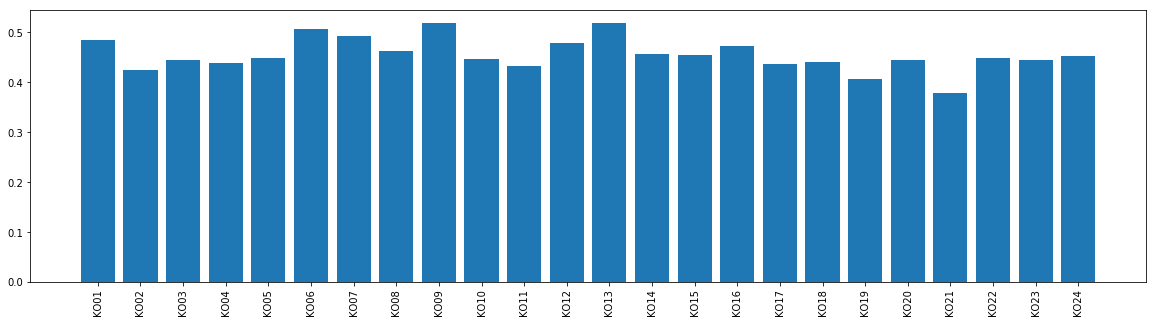

In [15]:
import matplotlib.pyplot as plt

dx = range(len(diff_size_for_analysis))
dy = diff_size_for_analysis
labels = sorted(filter(lambda x: x != 'h', y))

plt.figure(figsize=(20, 5))
plt.bar(dx, dy)
plt.xticks(dx, labels, rotation='vertical')
plt.show()

In [16]:
np.array(diff_size_for_analysis).mean()

0.45554101439032846

In [17]:
from scipy import stats

stats.ttest_ind(ds_flux, ds_diff)

Ttest_indResult(statistic=68.095925334263484, pvalue=7.789541863667195e-48)